In [1]:
#import packages
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 

In [2]:
#full edge list

df = pd.read_csv('../combined_final_weighted.csv')
df

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [3]:
#df for all relationships

df_all = pd.read_csv('../combined_final_weighted_groupedby.csv')
df_all

,node_start,node_end,weight
0,Albania,Bahamas,4.0
1,Algeria,British Virgin Islands,2.0
2,Algeria,United Kingdom,2.0
3,Algeria,United States,1.0
4,Andorra,Bahamas,52.0
...,...,...,...
2835,Zimbabwe,Hong Kong,3.0
2836,Zimbabwe,Jersey,1.0
2837,Zimbabwe,Panama,6.0
2838,Zimbabwe,Russia,2.0


In [4]:
# df for only jur

df_only_jur = df[df['status'] == 'jurisdiction']
df_only_jur = df_only_jur.drop(['weight','status'], axis = 1)
df_only_jur_grouped = df_only_jur.groupby(['node_start','node_end'], as_index = False).size()
df_only_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1212,Vietnam,Panama,1
1213,Yemen,Panama,1
1214,Zambia,British Virgin Islands,2
1215,Zimbabwe,British Virgin Islands,5


In [5]:
# df for all jur

all_jur_list = ['jurisdiction', 'officer_jurisdiction','intermediary jurisdiction']

df_all_jur = df[df['status'].isin(all_jur_list)]
df_all_jur = df_all_jur.drop(['weight','status'], axis = 1)
df_all_jur_grouped = df_all_jur.groupby(['node_start','node_end'], as_index = False).size()
df_all_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Costa Rica,3
...,...,...,...
1222,Vietnam,Panama,1
1223,Yemen,Panama,1
1224,Zambia,British Virgin Islands,2
1225,Zimbabwe,British Virgin Islands,5


In [6]:
#df for no intermediaries

no_int_list = ['jurisdiction', 'officer_jurisdiction','officer_base']

df_no_int = df[df['status'].isin(no_int_list)]
df_no_int = df_no_int.drop(['weight','status'], axis = 1)
df_no_int_grouped = df_no_int.groupby(['node_start','node_end'], as_index = False).size()
df_no_int_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Algeria,British Virgin Islands,2
2,Algeria,United Kingdom,2
3,Algeria,United States,1
4,Andorra,Bahamas,26
...,...,...,...
2750,Zimbabwe,Hong Kong,3
2751,Zimbabwe,Jersey,1
2752,Zimbabwe,Panama,3
2753,Zimbabwe,Russia,2


In [7]:
#function to get edge list

def get_edge_list(comm, comm_node_df, edges_df):
    
    #get list of nodes in specified community
    comm_node_list = comm_node_df[comm_node_df['community'] == comm]['name'].tolist()

    #get new edge list
    comm_df = edges_df[edges_df['node_end'].isin(comm_node_list)]
    comm_df = comm_df[comm_df['node_start'].isin(comm_node_list)].reset_index(drop = True)
    
    return comm_df

### Spinglass Directed ALL

In [8]:
spinglass_all_df = pd.read_csv('../directed_community_csv/df_spinglass.csv').drop('Unnamed: 0', axis = 1)
spinglass_all_df

,name,community
0,Albania,0
1,Bahamas,0
2,Algeria,5
3,British Virgin Islands,4
4,United Kingdom,5
...,...,...
191,Venezuela,3
192,Vietnam,4
193,Yemen,3
194,Zambia,4


In [9]:
#show how function works

get_edge_list(comm = 0, comm_node_df = spinglass_all_df, edges_df =  df_all)

,node_start,node_end,weight
0,Albania,Bahamas,4.0
1,Bahamas,Nevada,582.0
2,Bahamas,Niue,116.0
3,Bahamas,Wyoming,30.0
4,Belize,Bahamas,500.0
5,Belize,Mauritius,2.0
6,Belize,Niue,456.0
7,Belize,Wyoming,2.0
8,Finland,Bahamas,64.0
9,Finland,Belize,1.0


In [10]:
#check how many companies before running cells
spinglass_all_df.describe()

,community
count,196.000000
mean,3.397959
std,1.534157
min,0.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


In [11]:
#make a list of communities to run next function

spinglass_all_comms = sorted(spinglass_all_df['community'].unique().tolist())
spinglass_all_comms

[0, 1, 2, 3, 4, 5]

In [12]:
# get edge list for all communities

community_edgelist_dfs = []

for i in range(len(spinglass_all_comms)):
    community_edgelist_dfs.append(get_edge_list(comm = i, comm_node_df = spinglass_all_df, edges_df =  df_all))
    


In [13]:
# get edge list by specifying community number

community_edgelist_dfs[0]

,node_start,node_end,weight
0,Albania,Bahamas,4.0
1,Bahamas,Nevada,582.0
2,Bahamas,Niue,116.0
3,Bahamas,Wyoming,30.0
4,Belize,Bahamas,500.0
5,Belize,Mauritius,2.0
6,Belize,Niue,456.0
7,Belize,Wyoming,2.0
8,Finland,Bahamas,64.0
9,Finland,Belize,1.0


### Targeted Attack : Community 0

In [14]:
## try for 1st community: 0 
com_0 = community_edgelist_dfs[0]


In [15]:
#Plot graph 
g = ig.Graph.TupleList(com_0.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})

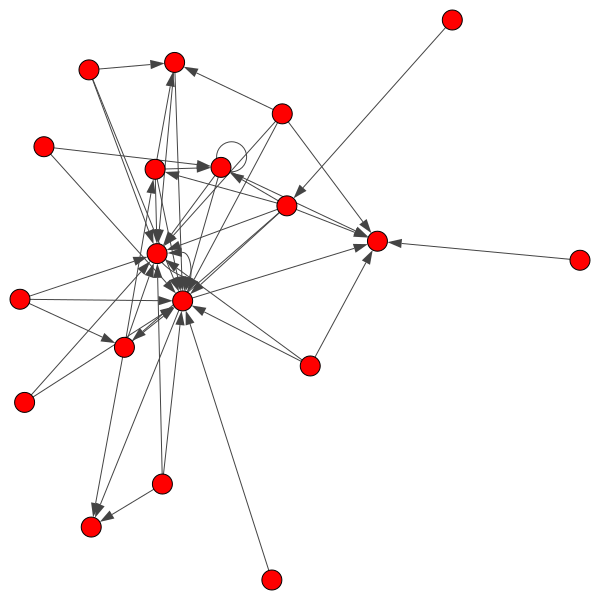

In [16]:
ig.plot(g)

In [17]:
len(g.vs.indices)

19

In [18]:
#g.vs.indices
com_0['node_start'].value_counts()

Switzerland    6
Isle of Man    4
Belize         4
Mauritius      4
Hungary        4
Sweden         3
Finland        3
Portugal       3
Bahamas        3
Poland         3
Ukraine        2
Lithuania      2
Qatar          2
Guinea         1
Haiti          1
Albania        1
Niue           1
Name: node_start, dtype: int64

In [19]:
uni =com_0['node_start'].unique()

In [20]:
len(uni)

17

In [21]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7f96cdde8220>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7f96cdde8220>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7f96cdde8220>, 2, {'name': 'Nevada'}),
 igraph.Vertex(<igraph.Graph object at 0x7f96cdde8220>, 3, {'name': 'Niue'}),
 igraph.Vertex(<igraph.Graph object at 0x7f96cdde8220>, 4, {'name': 'Wyoming'}),
 igraph.Vertex(<igraph.Graph object at 0x7f96cdde8220>, 5, {'name': 'Belize'}),
 igraph.Vertex(<igraph.Graph object at 0x7f96cdde8220>, 6, {'name': 'Mauritius'}),
 igraph.Vertex(<igraph.Graph object at 0x7f96cdde8220>, 7, {'name': 'Finland'}),
 igraph.Vertex(<igraph.Graph object at 0x7f96cdde8220>, 8, {'name': 'Guinea'}),
 igraph.Vertex(<igraph.Graph object at 0x7f96cdde8220>, 9, {'name': 'Switzerland'}),
 igraph.Vertex(<igraph.Graph object at 0x7f96cdde8220>, 10, {'name': 'Haiti'}),
 igraph.Vertex(<igraph.Graph object at 0x7f96cdde8220>, 11, {'name': 'Hungary'}),
 igraph.Vertex(<igraph.Graph

In [22]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'In_Degree':g.strength(mode='in',weights='weight')})

In [23]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [24]:
temp_df.head()

,Node_indice,Nodes,In_Degree
1,1,Bahamas,7298.0
3,3,Niue,5620.0
2,2,Nevada,910.0
4,4,Wyoming,34.0
13,13,Isle of Man,28.0


In [25]:
temp_df.tail()

,Node_indice,Nodes,In_Degree
11,11,Hungary,0.0
10,10,Haiti,0.0
8,8,Guinea,0.0
7,7,Finland,0.0
18,18,Sweden,0.0


In [26]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()
#print the list to check it
order_of_del

['Bahamas',
 'Niue',
 'Nevada',
 'Wyoming',
 'Isle of Man',
 'Mauritius',
 'Belize',
 'Ukraine',
 'Switzerland',
 'Qatar',
 'Portugal',
 'Poland',
 'Lithuania',
 'Albania',
 'Hungary',
 'Haiti',
 'Guinea',
 'Finland',
 'Sweden']

In [27]:
##don't bother with unweighted so will just attempt with weighted
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [28]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,Bahamas,2.444444,552.0,-0.160801,327.444444,0.092593,1.551020
1,2,0.01,Niue,1.823529,24.0,0.025208,22.941176,0.065744,1.694444
2,3,0.02,Nevada,1.312500,14.0,-0.013387,3.875000,0.054688,1.653846
3,4,0.02,Wyoming,1.133333,14.0,0.033150,3.866667,0.053333,1.619048
4,5,0.03,Isle of Man,0.928571,14.0,-0.218218,2.142857,0.040816,1.600000


In [29]:
df_type2_weighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
14,15,0.08,Hungary,0.0,0.0,NaN,0.0,0.0,NaN
15,16,0.08,Haiti,0.0,0.0,NaN,0.0,0.0,NaN
16,17,0.09,Guinea,0.0,0.0,NaN,0.0,0.0,NaN
17,18,0.09,Finland,0.0,0.0,NaN,0.0,0.0,NaN
18,19,0.10,Sweden,0.0,NaN,NaN,0.0,NaN,NaN


### Weighted

#### Weighted has to set y-limit because of huge range

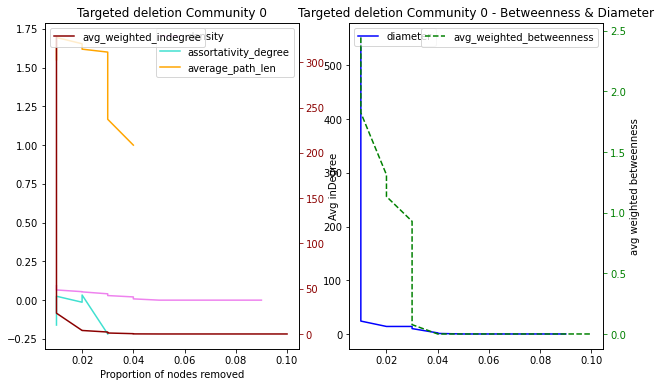

In [30]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(1,2,figsize=(10,6),sharey=False)

#Targeted attack LHS Graphs

ax[1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax[0].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Targeted deletion Community 0')

ax2_2 = ax[0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1].set_title('Targeted deletion Community 0 - Betweenness & Diameter')
ax[1].legend(loc='upper left')

ax_bet_tar = ax[1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()

### Targeted Attack : Community 1

In [31]:
## try for 1st community: 0 
com_1 = community_edgelist_dfs[1]


In [32]:
#Plot graph 
g1 = ig.Graph.TupleList(com_1.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})

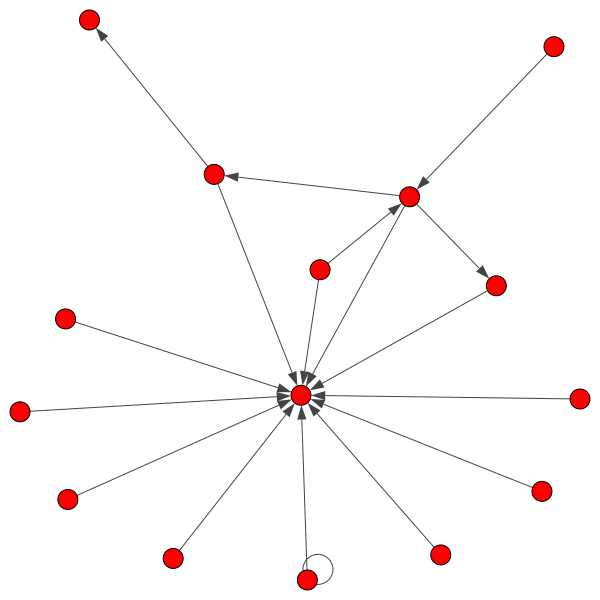

In [33]:
ig.plot(g1)

In [34]:
len(g1.vs.indices)

15

In [35]:
#g.vs.indices
com_1['node_start'].value_counts()

Canada                              3
Saint Lucia                         2
Netherlands                         2
Turks and Caicos Islands            2
Guyana                              1
Jamaica                             1
Suriname                            1
Puerto Rico                         1
Trinidad and Tobago                 1
Saint Martin (French part)          1
Curaçao                             1
Saint Vincent and the Grenadines    1
Djibouti                            1
Name: node_start, dtype: int64

In [36]:
uni =com_1['node_start'].unique()

In [37]:
len(uni)

13

In [38]:
#list(g.vs)

In [39]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g1.vs.indices,
                         'Nodes':g1.vs['name'],
                         'In_Degree':g1.strength(mode='in',weights='weight')})

In [40]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [41]:
temp_df.head()

,Node_indice,Nodes,In_Degree
1,1,Barbados,872.0
9,9,Saint Lucia,8.0
0,0,Canada,3.0
7,7,Netherlands Antilles,2.0
2,2,Curaçao,1.0


In [42]:
temp_df.tail()

,Node_indice,Nodes,In_Degree
10,10,Saint Martin (French part),0.0
11,11,Saint Vincent and the Grenadines,0.0
12,12,Suriname,0.0
13,13,Trinidad and Tobago,0.0
14,14,Turks and Caicos Islands,0.0


In [43]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()
#print the list to check it
order_of_del

['Barbados',
 'Saint Lucia',
 'Canada',
 'Netherlands Antilles',
 'Curaçao',
 'Netherlands',
 'Djibouti',
 'Guyana',
 'Jamaica',
 'Puerto Rico',
 'Saint Martin (French part)',
 'Saint Vincent and the Grenadines',
 'Suriname',
 'Trinidad and Tobago',
 'Turks and Caicos Islands']

In [44]:
#re-use func from above
df_type2_weighted = weighted_Type2_targeted_del(g1)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,Barbados,0.642857,5.0,-0.500000,1.071429,0.030612,1.75
1,2,0.01,Saint Lucia,0.692308,5.0,-0.666667,0.538462,0.029586,1.75
2,3,0.02,Canada,0.000000,2.0,NaN,0.166667,0.006944,1.00
3,4,0.02,Netherlands Antilles,0.000000,0.0,NaN,0.000000,0.000000,NaN
4,5,0.03,Curaçao,0.000000,0.0,NaN,0.000000,0.000000,NaN
5,6,0.03,Netherlands,0.000000,0.0,NaN,0.000000,0.000000,NaN
6,7,0.04,Djibouti,0.000000,0.0,NaN,0.000000,0.000000,NaN
7,8,0.04,Guyana,0.000000,0.0,NaN,0.000000,0.000000,NaN
8,9,0.05,Jamaica,0.000000,0.0,NaN,0.000000,0.000000,NaN
9,10,0.05,Puerto Rico,0.000000,0.0,NaN,0.000000,0.000000,NaN


In [45]:
df_type2_weighted.tail(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,Barbados,0.642857,5.0,-0.500000,1.071429,0.030612,1.75
1,2,0.01,Saint Lucia,0.692308,5.0,-0.666667,0.538462,0.029586,1.75
2,3,0.02,Canada,0.000000,2.0,NaN,0.166667,0.006944,1.00
3,4,0.02,Netherlands Antilles,0.000000,0.0,NaN,0.000000,0.000000,NaN
4,5,0.03,Curaçao,0.000000,0.0,NaN,0.000000,0.000000,NaN
5,6,0.03,Netherlands,0.000000,0.0,NaN,0.000000,0.000000,NaN
6,7,0.04,Djibouti,0.000000,0.0,NaN,0.000000,0.000000,NaN
7,8,0.04,Guyana,0.000000,0.0,NaN,0.000000,0.000000,NaN
8,9,0.05,Jamaica,0.000000,0.0,NaN,0.000000,0.000000,NaN
9,10,0.05,Puerto Rico,0.000000,0.0,NaN,0.000000,0.000000,NaN


### Weighted

#### Weighted has to set y-limit because of huge range

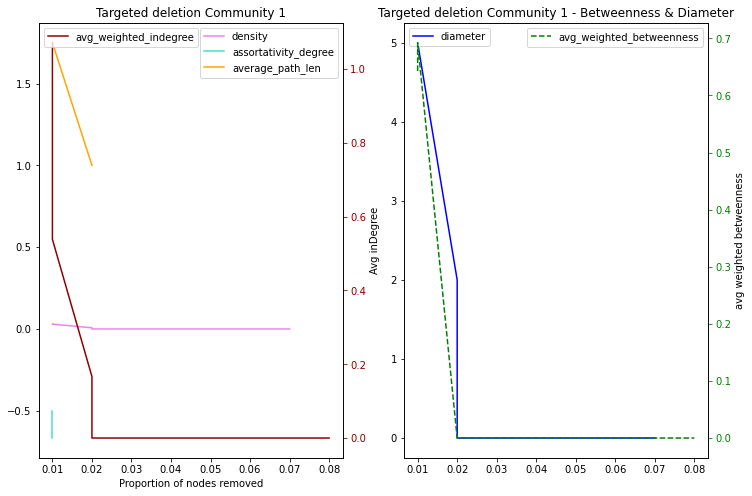

In [46]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(1,2,figsize=(12,8),sharey=False)

#Targeted attack LHS Graphs

ax[1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax[0].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Targeted deletion Community 1')

ax2_2 = ax[0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1].set_title('Targeted deletion Community 1 - Betweenness & Diameter')
ax[1].legend(loc='upper left')

ax_bet_tar = ax[1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()

### Targeted Attack : Community 2 

In [47]:
## try for 1st community: 0 
com_2 = community_edgelist_dfs[2]


In [48]:
#Plot graph 
g2 = ig.Graph.TupleList(com_2.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})

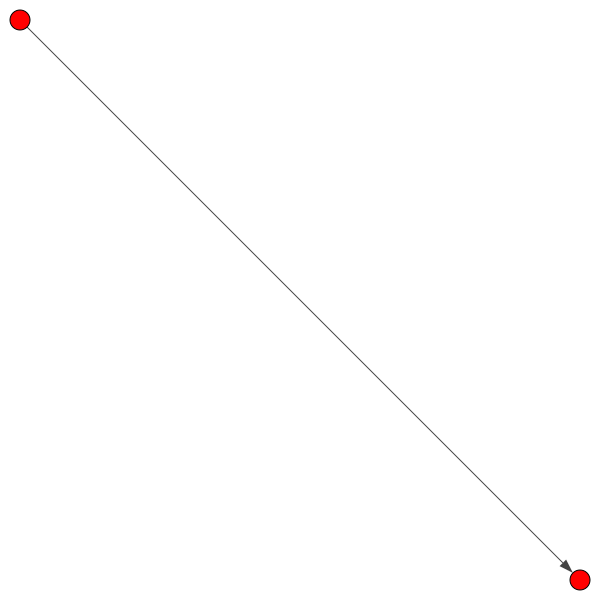

In [49]:
ig.plot(g2)

In [50]:
len(g2.vs.indices)

2

In [51]:
#g.vs.indices
com_2['node_start'].value_counts()

Macao    1
Name: node_start, dtype: int64

In [52]:
uni =com_2['node_start'].unique()

In [53]:
len(uni)

1

In [54]:
list(g2.vs)

[igraph.Vertex(<igraph.Graph object at 0x7f96d0b34b80>, 0, {'name': 'Macao'}),
 igraph.Vertex(<igraph.Graph object at 0x7f96d0b34b80>, 1, {'name': 'Malta'})]

In [55]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g2.vs.indices,
                         'Nodes':g2.vs['name'],
                         'In_Degree':g2.strength(mode='in',weights='weight')})

In [56]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [57]:
temp_df.head()

,Node_indice,Nodes,In_Degree
1,1,Malta,230.0
0,0,Macao,0.0


In [58]:
temp_df.tail()

,Node_indice,Nodes,In_Degree
1,1,Malta,230.0
0,0,Macao,0.0


In [59]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()
#print the list to check it
order_of_del

['Malta', 'Macao']

In [60]:
df_type2_weighted = weighted_Type2_targeted_del(g2)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,Malta,0.0,0.0,NaN,0.0,0.0,NaN
1,2,0.01,Macao,0.0,NaN,NaN,0.0,NaN,NaN


In [61]:
df_type2_weighted.tail(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,Malta,0.0,0.0,NaN,0.0,0.0,NaN
1,2,0.01,Macao,0.0,NaN,NaN,0.0,NaN,NaN


### Weighted

#### Weighted has to set y-limit because of huge range

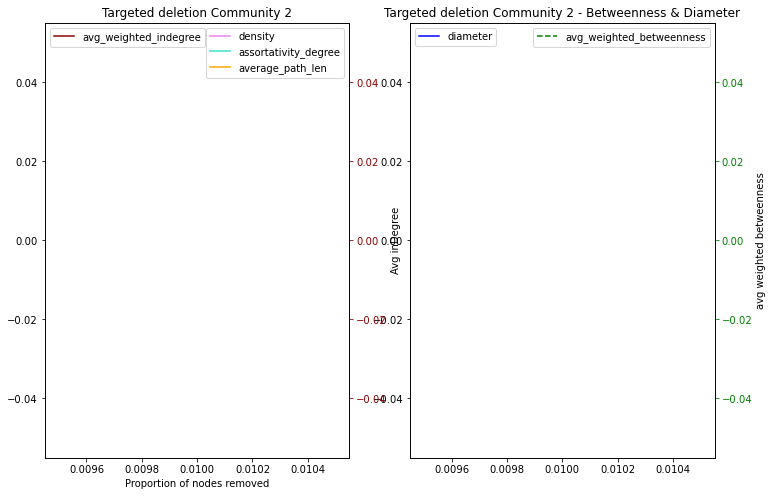

In [62]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(1,2,figsize=(12,8),sharey=False)

#Targeted attack LHS Graphs

ax[1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax[0].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Targeted deletion Community 2')

ax2_2 = ax[0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1].set_title('Targeted deletion Community 2 - Betweenness & Diameter')
ax[1].legend(loc='upper left')

ax_bet_tar = ax[1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()